# 01 - Exploração e Limpeza de Dados
Autora: Fernanda Baptista de Siqueira  
Curso: MBA em Tecnologia para Negócios – AI, Data Science e Big Data  
Tema: Análise de Acidentes de Trânsito em Porto Alegre (2020–2024)

---

## 1. Importação e Configuração
Carregamento das bibliotecas e dataset bruto.


In [3]:
# Manipulação e Análise
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Salvar dataframes
import os

# Configurações visuais
plt.style.use("seaborn-v0_8")
sns.set_theme(palette="deep")
pd.set_option('display.max_columns', None)



## 2. Leitura e Schema Inicial
1) Carrega o arquivo `acidentes.csv`


In [4]:
caminho_dados = '../dados/primarios/acidentes.csv'

try:
    df = pd.read_csv(caminho_dados, sep=';', encoding='utf-8')
    print("CSV original lido com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo '{caminho_dados}' não encontrado. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

CSV original lido com sucesso!


2) Entende e inspeciona DataFrame

In [5]:
# Lista as cinco primeira linhas
print("\nCinco primeiras linhas:")
print(df.head())

# Mostra o número de linhas e colunas
print("\nDimensões do Dataset (linhas, colunas)")
print(df.shape)

# Mostra tipo de dados, valores não nulos
print("\nInformações gerais do DataFrame:")
df.info()

# Conta valores ausentes por coluna
print("\nContagem de Valores Ausentes por Coluna")
print(df.isnull().sum())


Cinco primeiras linhas:
         data_extracao  predial1  queda_arr                 data  feridos  \
0  2025-06-01 01:33:13       0.0        0.0  2020-10-17 00:00:00        1   
1  2025-06-01 01:33:13     598.0        0.0  2020-01-01 00:00:00        1   
2  2025-06-01 01:33:13    1271.0        0.0  2020-01-01 00:00:00        1   
3  2025-06-01 01:33:13    1901.0        0.0  2020-01-02 00:00:00        2   
4  2025-06-01 01:33:13    3302.0        0.0  2020-01-02 00:00:00        1   

   feridos_gr  mortes  morte_post  fatais  auto  taxi  lotacao  onibus_urb  \
0           0       0           0       0     3     0        0           0   
1           0       0           0       0     0     1        0           0   
2           1       0           0       0     1     0        0           0   
3           0       0           0       0     0     0        0           0   
4           0       0           0       0     1     0        0           0   

   onibus_met  onibus_int  caminhao  moto  

3) Limpa nomes colunas; remove 'data_extracao', 'consorcio', 'latitude' e 'longitude'

In [6]:
# Remove espaços em branco no início/fim dos nomes das colunas (boa prática)
df.columns = df.columns.str.strip()

# Remove colunas não utilizadas
df = df.drop(columns=['data_extracao', 'consorcio', 'latitude', 'longitude'], errors='ignore')

# Lista nome de colunas
print(df.columns)

Index(['predial1', 'queda_arr', 'data', 'feridos', 'feridos_gr', 'mortes',
       'morte_post', 'fatais', 'auto', 'taxi', 'lotacao', 'onibus_urb',
       'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta',
       'outro', 'cont_vit', 'ups', 'patinete', 'idacidente', 'log1', 'log2',
       'tipo_acid', 'dia_sem', 'hora', 'noite_dia', 'regiao'],
      dtype='object')


## 3. Tratamento
1) Transforma tipos; remove inválidos

In [8]:
# Converte 'data' para datetime
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Remove inválidos 'data', 'hora', 'log1', 'regiao'
df = df.dropna(subset=['data', 'hora', 'log1', 'regiao'])

# Remove data fora do escopo (2020-2025)
df = df[(df['data'] >= '2020-01-01') & (df['data'] <= '2025-04-01')]
print("Datas fora do escopo (2020-2025) removidas com sucesso.")

# Remove chaves duplicadas
df = df.drop_duplicates(subset='idacidente')

# Transforma colunas tipos de colunas em Categoria
col_cat = ['regiao', 'tipo_acid', 'dia_sem', 'noite_dia']
df[col_cat] = df[col_cat].astype('category')

# Transforma colunas tipos de colunas Inteiro
col_int = [c for c in [
  'queda_arr', 'feridos', 'feridos_gr', 'mortes',
  'morte_post', 'fatais', 'auto', 'taxi', 'lotacao', 'onibus_urb',
  'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta',
  'outro', 'cont_vit', 'ups', 'patinete', 'idacidente', 'predial1'
  ] if c in df.columns]
for c in col_int:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int32')

# Transforma colunas tipos de colunas em Float
col_float = [c for c in ['longitude', 'latitude'] if c in df.columns]
for c in col_float:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('float32')

# Transforma colunas tipos de colunas em String
col_str = [c for c in ['log1', 'log2'] if c in df.columns]
for c in col_str:
    df[c] = df[c].astype('string')

# Transforma coluna 'hora' para timedelta
df['hora'] = pd.to_timedelta(df['hora'], errors='coerce')

     
print("\nInformações após:")
df.info()
df.describe(include='all')
print(df.head())

Datas fora do escopo (2020-2025) removidas com sucesso.

Informações após:
<class 'pandas.core.frame.DataFrame'>
Index: 68837 entries, 0 to 69520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   predial1    64799 non-null  Int32          
 1   queda_arr   68837 non-null  Int32          
 2   data        68837 non-null  datetime64[ns] 
 3   feridos     68837 non-null  Int32          
 4   feridos_gr  68837 non-null  Int32          
 5   mortes      68837 non-null  Int32          
 6   morte_post  68837 non-null  Int32          
 7   fatais      68837 non-null  Int32          
 8   auto        68837 non-null  Int32          
 9   taxi        68837 non-null  Int32          
 10  lotacao     68837 non-null  Int32          
 11  onibus_urb  68837 non-null  Int32          
 12  onibus_met  68837 non-null  Int32          
 13  onibus_int  68837 non-null  Int32          
 14  caminhao    68837 non-null  Int3

2) Cria novas variáveis e DataFrames necessários

In [9]:
# Cria coluna 'hora_int'
df['hora_int'] = df['hora'].dt.components['hours']

# Cria coluna 'data_hora'
df['data_hora'] = df['data']+ df['hora']

# Cria df_20_24 (teste) e df_2025 (validacao)
df_20_24 = df[(df["data"].dt.year >= 2020) & (df["data"].dt.year <= 2024)].copy()
df_2025 = df[(df['data'].dt.year == 2025)].copy()



3) Salva DataFrames tratatos

In [12]:
# Salva dataframe tratado
df.to_parquet("../dados/intermediarios/acidentes_tratado.parquet", index=False, engine="pyarrow")
df_20_24.to_parquet("../dados/intermediarios/df_20_24.parquet", index=False, engine="pyarrow")
df_2025.to_parquet("../dados/intermediarios/df_2025.parquet", index=False, engine="pyarrow")

## 4) Análise Exploratória Inicial


1) Distribuição temporal

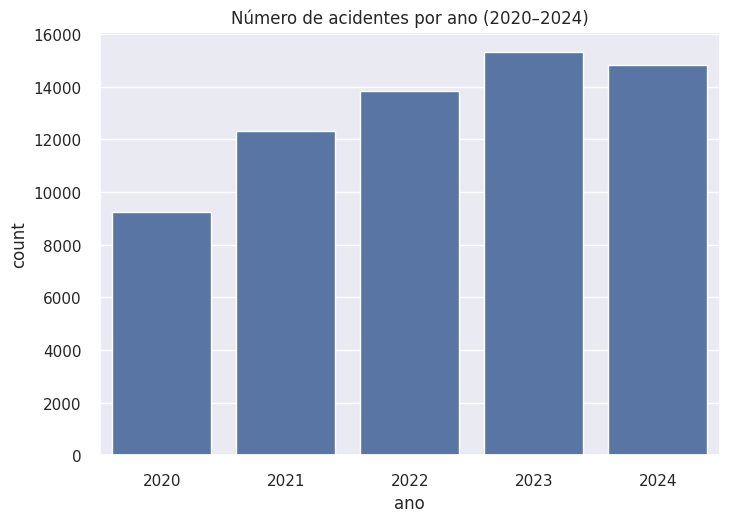

In [10]:
df_20_24["ano"] = df_20_24["data"].dt.year
sns.countplot(x="ano", data=df_20_24)
plt.title("Número de acidentes por ano (2020–2024)")
plt.show()


2) Acidentes mais comuns

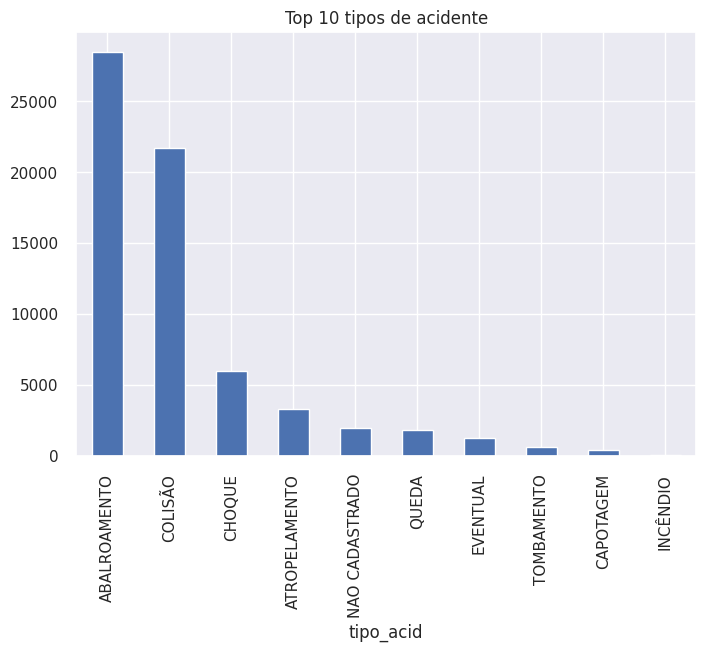

In [11]:
df_20_24["tipo_acid"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 tipos de acidente")
plt.show()

3) 

In [ ]:
sns.histplot(df_20_24["fatais"], bins=5, discrete=True)
plt.title("Distribuição de vítimas fatais")
plt.show()
